# 3. 상위 5개 팀의 경기력 분석 - 승패편
직접 선정한 상위 5개팀을 승부를 예측하기 위해 비교하고, 승패 관련 컬럼을 분석해 성향을 파악하려 한다. 모든 액션은 국가별로 구하게 된다.
<hr>

- 승률 구하기
- 전반 / 후반 중 어디에 더 강하고 약한지 구하기 (성향)
- 득점시간과 실점시간을 활용분석해 강하고 약한 시간대 구하기 (성향)
- 이긴다면 처음부터 쭉 강세를 잡는지, 역전에 강한 타입인지 구하기 (성향)

In [1]:
# Pandas 라이브러리 임포트
import pandas as pd
from pandas import Series, DataFrame

# 시각화를 위한 matplotlib 임포트
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"

In [2]:
# 2021년 ~ 2022년 대표 5팀 에이매치 기록 데이터 불러오기


data = pd.read_excel('data/20212022matchdata.xlsx', header=[0, 1])
data.head()

분석팀                                                         ...  \
          날짜  국가 피파랭킹  포메이션 전반득점 전반실점 후반득점 후반실점         득점시간   실점시간  ...   
0 2021-03-25  독일   13   433    2    0    1    0       3,7,56    NaN  ...   
1 2021-03-28  독일   13   433    1    0    0    0           16    NaN  ...   
2 2021-03-31  독일   13  3142    0    1    1    1           63  45,85  ...   
3 2021-06-15  독일   12  3421    0    1    0    0          NaN     20  ...   
4 2021-06-19  독일   12  3421    2    1    2    1  35,39,51,60  15,67  ...   

                   상대팀                                               
   평균연령   평균신장      국가 피파랭킹  포메이션 오프사이드 공격권 박탈횟수 유효 슈팅  평균연령   평균신장  
0  29.0  185.0   아이슬란드   46  4141     1        6     2  32.1  187.1  
1  27.9  185.4    루마니아   37  4231     2        6     2  28.9  180.1  
2  27.5  183.8  북마케도니아   65   352     1        9     3  29.4  181.2  
3  29.8  185.5     프랑스    4   433     5        9     1  29.0  182.7  
4  29.5  185.5    포르투갈    9  4141     2        5     2  29.9  181.1  

[5 rows x 62 columns]

In [3]:
# 2021년 ~ 2022년 대표 5팀 에이매치 기록 데이터에 최종 스코어, 결과, 패스 성공률 컬럼 넣기

data[('분석팀', '최종득점')] = data[('분석팀', '전반득점')] + data[('분석팀', '후반득점')]
data[('분석팀', '최종실점')] = data[('분석팀', '전반실점')] + data[('분석팀', '후반실점')]
data[('분석팀', '패스 성공률')] = (data[('분석팀', '패스성공횟수')] / data[('분석팀', '패스횟수')] * 100).round(1)

def winlose(x) :
    if x[0] > x[1] :
        return '승'
    elif x[0] < x[1] :
        return '패'
    else :
        return '무'

data[('분석팀', '결과')] = data[[('분석팀', '최종득점'), ('분석팀', '최종실점')]].apply(winlose, axis = 1)
data

분석팀                                                                 \
            날짜    국가 피파랭킹  포메이션 전반득점 전반실점 후반득점 후반실점         득점시간         실점시간   
0   2021-03-25    독일   13   433    2    0    1    0       3,7,56          NaN   
1   2021-03-28    독일   13   433    1    0    0    0           16          NaN   
2   2021-03-31    독일   13  3142    0    1    1    1           63        45,85   
3   2021-06-15    독일   12  3421    0    1    0    0          NaN           20   
4   2021-06-19    독일   12  3421    2    1    2    1  35,39,51,60        15,67   
..         ...   ...  ...   ...  ...  ...  ...  ...          ...          ...   
96  2022-06-07  잉글랜드    5  4231    0    0    1    1           88           51   
97  2022-06-11  잉글랜드    5  4231    0    0    0    0          NaN          NaN   
98  2022-06-14  잉글랜드    5   433    0    1    0    3          NaN  16,70,80,89   
99  2022-09-23  잉글랜드    5   343    0    0    0    1          NaN           68   
100 2022-09-26  잉글랜드    5  3421    0    0    3    3     72,75,83     52,67,87   

     ...   상대팀                                    분석팀                 
     ...  포메이션 오프사이드 공격권 박탈횟수 유효 슈팅  평균연령   평균신장 최종득점 최종실점 패스 성공률 결과  
0    ...  4141     1        6     2  32.1  187.1    3    0   92.6  승  
1    ...  4231     2        6     2  28.9  180.1    1    0   89.8  승  
2    ...   352     1        9     3  29.4  181.2    1    2   88.8  패  
3    ...   433     5        9     1  29.0  182.7    0    1   89.2  패  
4    ...  4141     2        5     2  29.9  181.1    4    2   90.2  승  
..   ...   ...   ...      ...   ...   ...    ...  ...  ...    ... ..  
96   ...  3412     4       14     6  28.1  185.6    1    1   79.0  무  
97   ...   433     0        4     3  26.0  182.9    0    0   88.9  무  
98   ...  3421     0       12     5  27.8  185.1    0    4   88.9  패  
99   ...   352     2        3     3  27.2  185.1    0    1   88.3  패  
100  ...  4231     1       12     4  26.4  182.3    3    3   79.0  무  

[101 rows x 66 columns]

## 3-1. 승률 구하기
- 국가별로 승률을 구해보자.

In [4]:
# 분석팀을 국가 컬럼으로 그룹화한 다음 전체 경기 중 이긴 비율(승률) 구하기
winportion=round((data['분석팀'].groupby('국가')['결과'].value_counts().xs('승', axis=0,level=1)/data['분석팀'].groupby('국가')['결과'].count())*100,2)
winportion
df=pd.DataFrame(data=[winportion], index=['승률']).T
df

,승률
국가,
독일,55.00
스페인,55.00
잉글랜드,56.52
포르투갈,55.00
프랑스,38.89


## 3-2. 전반 / 후반 중 어디에 더 강하고 약한지 구하기 (성향)
- 각 팀마다 전반 혹은 후반 둘 중 한 시간대에 골을 잘 넣는 성향이 보일 것이다.
- 반대로, 전반 혹은 후반 둘 중 한 시간대는 실점에 취약한 시간대도 있을 것이다.

In [5]:
# 전반 득점 비중 컬럼 추가
first_half_score_portion=round((data['분석팀'].groupby('국가')['전반득점'].sum()/data['분석팀'].groupby('국가')['최종득점'].sum())*100,2)

In [6]:
# 후반 득점 비중 컬럼 추가
second_half_score_portion=round((data['분석팀'].groupby('국가')['후반득점'].sum()/data['분석팀'].groupby('국가')['최종득점'].sum())*100,2)

In [7]:
# 전반 실점 비중 컬럼 추가
first_half_conceded_portion=round((data['분석팀'].groupby('국가')['전반실점'].sum()/data['분석팀'].groupby('국가')['최종실점'].sum())*100,2)

In [8]:
# 후반 실점 비중 컬럼 추가
second_half_conceded_portion=round((data['분석팀'].groupby('국가')['후반실점'].sum()/data['분석팀'].groupby('국가')['최종실점'].sum())*100,2)

In [9]:
# 국가별 전후반 득점 실점 비중 데이터프레임 생성
df=pd.concat([df,pd.DataFrame(data=[first_half_score_portion, second_half_score_portion,first_half_conceded_portion,second_half_conceded_portion], index=['전반득점비중','후반득점비중','전반실점비중','후반실점비중']).T],axis=1)
df

,승률,전반득점비중,후반득점비중,전반실점비중,후반실점비중
국가,,,,,
독일,55.00,39.62,60.38,35.00,65.00
스페인,55.00,50.00,50.00,26.67,73.33
잉글랜드,56.52,42.59,57.41,14.29,85.71
포르투갈,55.00,55.00,45.00,52.94,47.06
프랑스,38.89,33.33,66.67,56.25,43.75


In [10]:
#전후반 득실점에 따라 득점 강세 시간이나 실점 취약 시간 도출 함수
def compare(x):
    if(x[0]>x[1]):
        return '전반'
    elif(x[0]<x[1]):
        return '후반'
    else :
        return 'same'

In [11]:
df['득점강세시간']=df[['전반득점비중','후반득점비중']].apply(compare, axis=1)

In [12]:
df['실점취약시간']=df[['전반실점비중','후반실점비중']].apply(compare, axis=1)

In [13]:
df.drop(['전반득점비중','후반득점비중','전반실점비중','후반실점비중'],axis=1,inplace=True)

In [14]:
df

,승률,득점강세시간,실점취약시간
국가,,,
독일,55.00,후반,후반
스페인,55.00,same,후반
잉글랜드,56.52,후반,후반
포르투갈,55.00,전반,전반
프랑스,38.89,후반,전반


## 3-3. 득점시간과 실점시간을 활용분석해 강하고 약한 시간대 구하기 (성향)
- 더욱 세밀하게 들어가 득점시간과 실점시간대를 분석하여, 득점에 강하거나 혹은 실점에 취약한 시간대를 모두 알아보자.

In [15]:
# 국가별 득실점 시간대 도출을 위한 전체 경기 분석팀 국가 계층 색인으로 구분
germanmatch=data[data[('분석팀','국가')]=='독일']
francematch=data[data[('분석팀','국가')]=='프랑스']
portugalmatch=data[data[('분석팀','국가')]=='포르투갈']
englandmatch=data[data[('분석팀','국가')]=='잉글랜드']
spainmatch=data[data[('분석팀','국가')]=='스페인']
matches=[germanmatch,francematch,portugalmatch,englandmatch,spainmatch]
nation=['독일', '프랑스', '포르투갈', '잉글랜드', '스페인']
resultArr=[]
resultConceded=[]
nation_goal_minute_series=[]
nation_conceded_minute_series=[]

In [16]:
# 시간을 10분대로 나누어 득점 시간대마다 득점수 구하기
def countgoal(x):
    m = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    for i in x.values :
        if i < 10 : m[0] = m[0] + 1
        elif i < 20 : m[1] = m[1] + 1
        elif i < 30 : m[2] = m[2] + 1
        elif i < 40 : m[3] = m[3] + 1
        elif i < 50 : m[4] = m[4] + 1
        elif i < 60 : m[5] = m[5] + 1
        elif i < 70 : m[6] = m[6] + 1
        elif i < 80 : m[7] = m[7] + 1
        elif i < 90 : m[8] = m[8] + 1
        elif i < 100 : m[9] = m[9] + 1
        elif i < 110 : m[10] = m[10] + 1
        elif i < 120 : m[11] = m[11] + 1
        else : m[12] = m[12] + 1

    for i in range(len(m)) :
        print(i * 10, '분대 : ', m[i])
    resultArr.append(m)

In [17]:
#시간을 10분대로 나누어 실점 시간대마다 실점수 구하기
def countconceded(x):
    m = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    for i in x.values :
        if i < 10 : m[0] = m[0] + 1
        elif i < 20 : m[1] = m[1] + 1
        elif i < 30 : m[2] = m[2] + 1
        elif i < 40 : m[3] = m[3] + 1
        elif i < 50 : m[4] = m[4] + 1
        elif i < 60 : m[5] = m[5] + 1
        elif i < 70 : m[6] = m[6] + 1
        elif i < 80 : m[7] = m[7] + 1
        elif i < 90 : m[8] = m[8] + 1
        elif i < 100 : m[9] = m[9] + 1
        elif i < 110 : m[10] = m[10] + 1
        elif i < 120 : m[11] = m[11] + 1
        else : m[12] = m[12] + 1

    for i in range(len(m)) :
        print(i * 10, '분대 : ', m[i])
    resultConceded.append(m)

In [18]:
#독일 전 경기 득점시간 담은 시리즈 출력
germangoalminute=germanmatch[('분석팀','득점시간')]
germangoalminute.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
germangoalminute=germangoalminute.astype(str)
germangoalminute = germangoalminute.str.split(',', expand = True)
germangoalminute
germangoalminute_series = pd.concat([germangoalminute[0], germangoalminute[1], germangoalminute[2], germangoalminute[3], germangoalminute[4], germangoalminute[5], germangoalminute[6], germangoalminute[7], germangoalminute[8]], axis =  0)
germangoalminute_series.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
germangoalminute_series = pd.to_numeric(germangoalminute_series) # 숫자 형태로 변환
nation_goal_minute_series.append(germangoalminute_series)
germangoalminute_series

0      3
1     16
2     63
4     35
5     66
7     41
8      6
9      4
10    52
11    50
12    11
13    15
14    73
15    51
16     9
17    10
19    52
0      7
4     39
5     84
7     77
8     15
9     24
10    81
11    70
12    20
13    45
17    45
19    67
0     56
4     51
8     35
9     56
11    73
12    22
13    50
17    51
19    87
4     60
8     45
9     89
11    83
12    23
13    64
17    68
8     52
12    49
17    69
12    76
12    80
12    86
12    89
dtype: int64

In [19]:
#프랑스 전 경기 득점시간담은 시리즈 출력
francegoalminute=francematch[('분석팀','득점시간')]
francegoalminute.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
francegoalminute=francegoalminute.astype(str)
francegoalminute = francegoalminute.str.split(',', expand = True)
francegoalminute
francegoalminute_series = pd.concat([francegoalminute[0], francegoalminute[1], francegoalminute[2], francegoalminute[3], francegoalminute[4], francegoalminute[5], francegoalminute[6], francegoalminute[7]], axis =  0)
francegoalminute_series.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
francegoalminute_series = pd.to_numeric(francegoalminute_series) # 숫자 형태로 변환
nation_goal_minute_series.append(francegoalminute_series)
francegoalminute_series

20    19
21    19
22    60
23    20
24    66
25    45
26    57
27    51
28    52
29    83
31    39
32    50
33    25
34    56
36     6
37    66
21    44
25    47
26    59
33    53
34    65
36    12
37    76
26    75
36    32
36    55
36    59
36    75
36    84
36    87
dtype: int64

In [20]:
#포르투갈 전 경기 득점시간담은 시리즈 출력
portugalgoalminute=portugalmatch[('분석팀','득점시간')]
portugalgoalminute.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
portugalgoalminute=portugalgoalminute.astype(str)
portugalgoalminute = portugalgoalminute.str.split(',', expand = True)
portugalgoalminute
portugalgoalminute_series = pd.concat([portugalgoalminute[0], portugalgoalminute[1], portugalgoalminute[2], portugalgoalminute[3], portugalgoalminute[4]], axis =  0)
portugalgoalminute_series.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
portugalgoalminute_series = pd.to_numeric(portugalgoalminute_series) # 숫자 형태로 변환
nation_goal_minute_series.append(portugalgoalminute_series)
portugalgoalminute_series


38    37
39    11
40    45
41    84
42    15
43    31
45    89
46    26
47     8
49     2
50    15
51    32
52    82
53    15
54    33
56    33
39    36
40    50
41    87
42    67
43    60
45    95
46    31
47    13
50    42
51    65
53    35
54    38
56    45
40    80
41    91
46    75
47    17
50    93
53    39
56    52
47    69
53    68
56    82
47    87
dtype: int64

In [21]:
# 잉글랜드 전 경기 득점시간담은 시리즈 출력
englandgoalminute=englandmatch[('분석팀','득점시간')]
englandgoalminute.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
englandgoalminute=englandgoalminute.astype(str)
englandgoalminute = englandgoalminute.str.split(',', expand = True)
englandgoalminute
englandgoalminute_series = pd.concat([englandgoalminute[0], englandgoalminute[1], englandgoalminute[2], englandgoalminute[3], englandgoalminute[4], englandgoalminute[5], englandgoalminute[6], englandgoalminute[7], englandgoalminute[8]], axis =  0)
englandgoalminute_series.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
englandgoalminute_series = pd.to_numeric(englandgoalminute_series) # 숫자 형태로 변환
nation_goal_minute_series.append(englandgoalminute_series)
englandgoalminute_series


78      14
79      38
80      19
81      57
83      12
84      75
85       4
86      39
87       2
88      55
89      18
90      72
91      17
92      24
93       9
94       6
96      88
100     72
78      21
79      63
80      85
84      86
85      46
86     104
88      63
89      72
91      40
93      18
94      15
100     75
78      31
85      50
88      69
89      18
91      59
93      28
94      27
100     83
78      53
85      63
88      87
89      85
91      79
93      33
94      31
78      83
91      86
93      46
94      39
94      42
94      58
94      69
94      78
dtype: int64

In [22]:
# 스페인 전 경기 득점시간담은 시리즈 출력
spaingoalminute=spainmatch[('분석팀','득점시간')]
spaingoalminute.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
spaingoalminute=spaingoalminute.astype(str)
spaingoalminute = spaingoalminute.str.split(',', expand = True)
spaingoalminute
spaingoalminute_series = pd.concat([spaingoalminute[0], spaingoalminute[1], spaingoalminute[2], spaingoalminute[3], spaingoalminute[4]], axis =  0)
spaingoalminute_series.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
spaingoalminute_series = pd.to_numeric(spaingoalminute_series) # 숫자 형태로 변환
nation_goal_minute_series.append(spaingoalminute_series)
spaingoalminute_series


58     33
59     56
60     34
62     25
63     30
64     38
65      8
66     80
67      4
68     14
69     32
70     26
71     86
72     25
73     45
74     13
75     24
76     55
77     88
59     91
60     36
63     45
64     57
68     25
69     88
73     90
75     75
60     75
63     56
64     76
68     41
63     67
64    100
68     63
63     71
64    103
dtype: int64

In [23]:
# 국가별 시간대마다 득점수 출력
for s in nation_goal_minute_series:
    countgoal(s)

0 분대 :  5
10 분대 :  5
20 분대 :  4
30 분대 :  3
40 분대 :  5
50 분대 :  10
60 분대 :  7
70 분대 :  5
80 분대 :  8
90 분대 :  0
100 분대 :  0
110 분대 :  0
120 분대 :  0
0 분대 :  1
10 분대 :  3
20 분대 :  2
30 분대 :  2
40 분대 :  3
50 분대 :  9
60 분대 :  4
70 분대 :  3
80 분대 :  3
90 분대 :  0
100 분대 :  0
110 분대 :  0
120 분대 :  0
0 분대 :  2
10 분대 :  6
20 분대 :  1
30 분대 :  10
40 분대 :  3
50 분대 :  2
60 분대 :  5
70 분대 :  1
80 분대 :  7
90 분대 :  3
100 분대 :  0
110 분대 :  0
120 분대 :  0
0 분대 :  4
10 분대 :  8
20 분대 :  4
30 분대 :  6
40 분대 :  4
50 분대 :  6
60 분대 :  5
70 분대 :  7
80 분대 :  8
90 분대 :  0
100 분대 :  1
110 분대 :  0
120 분대 :  0
0 분대 :  2
10 분대 :  2
20 분대 :  5
30 분대 :  6
40 분대 :  3
50 분대 :  4
60 분대 :  2
70 분대 :  4
80 분대 :  4
90 분대 :  2
100 분대 :  2
110 분대 :  0
120 분대 :  0


In [24]:
# 국가별 시간대마다 득점수 리스트 배열 출력
resultArr 

[[5, 5, 4, 3, 5, 10, 7, 5, 8, 0, 0, 0, 0],
 [1, 3, 2, 2, 3, 9, 4, 3, 3, 0, 0, 0, 0],
 [2, 6, 1, 10, 3, 2, 5, 1, 7, 3, 0, 0, 0],
 [4, 8, 4, 6, 4, 6, 5, 7, 8, 0, 1, 0, 0],
 [2, 2, 5, 6, 3, 4, 2, 4, 4, 2, 2, 0, 0]]

In [25]:
#독일 전 경기 실점시간 담은 시리즈 출력
germanconcededminute=germanmatch[('분석팀','실점시간')]
germanconcededminute.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
germanconcededminute=germanconcededminute.astype(str)
germanconcededminute = germanconcededminute.str.split(',', expand = True)
germanconcededminute
germanconcededminute_series = pd.concat([germanconcededminute[0], germanconcededminute[1], germanconcededminute[2]], axis =  0)
germanconcededminute_series.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
germanconcededminute_series = pd.to_numeric(germanconcededminute_series) # 숫자 형태로 변
nation_conceded_minute_series.append(germanconcededminute_series)
germanconcededminute_series


2     45
3     20
4     15
6     75
10     9
13    59
14    70
15    88
16     6
17    78
18    17
19    72
2     85
4     67
6     86
17    93
19    75
19    83
dtype: int64

In [26]:
#프랑스 전 경기 득점시간 담은 시리즈 출력
franceconcededminute=francematch[('분석팀','실점시간')]
franceconcededminute.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
franceconcededminute=franceconcededminute.astype(str)
franceconcededminute = franceconcededminute.str.split(',', expand = True)
franceconcededminute
franceconcededminute_series = pd.concat([franceconcededminute[0], franceconcededminute[1], franceconcededminute[2]], axis =  0)
franceconcededminute_series.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
franceconcededminute_series = pd.to_numeric(franceconcededminute_series) # 숫자 형태로 변
nation_conceded_minute_series.append(franceconcededminute_series)
franceconcededminute_series


20    57
24    45
25    31
26    15
27    68
28    83
29    37
30     5
31    36
32    44
35    33
25    60
26    81
27    88
35    39
26    90
dtype: int64

In [27]:
#포르투갈 전 경기 득점시간 담은 시리즈 출력
portugalconcededminute=portugalmatch[('분석팀','실점시간')]
portugalconcededminute.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
portugalconcededminute=portugalconcededminute.astype(str)
portugalconcededminute = portugalconcededminute.str.split(',', expand = True)
portugalconcededminute
portugalconcededminute_series = pd.concat([portugalconcededminute[0], portugalconcededminute[1], portugalconcededminute[2],portugalconcededminute[3]], axis =  0)
portugalconcededminute_series.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
portugalconcededminute_series = pd.to_numeric(portugalconcededminute_series) # 숫자 형태로 변
nation_conceded_minute_series.append(portugalconcededminute_series)
portugalconcededminute_series

39    46
40    30
42    35
43    45
44    42
45    45
49    33
50    65
52    25
55     1
57    88
39    60
42    39
43    47
49    90
42    51
42    60
dtype: int64

In [28]:
#잉글랜드 전 경기 득점시간 담은 시리즈 출력
englandconcededminute=englandmatch[('분석팀','실점시간')]
englandconcededminute.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
englandconcededminute=englandconcededminute.astype(str)
englandconcededminute = englandconcededminute.str.split(',', expand = True)
englandconcededminute
englandconcededminute_series = pd.concat([englandconcededminute[0], englandconcededminute[1], englandconcededminute[2],englandconcededminute[3]], axis =  0)
englandconcededminute_series.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
englandconcededminute_series = pd.to_numeric(englandconcededminute_series) # 숫자 형태로 변
nation_conceded_minute_series.append(englandconcededminute_series)
englandconcededminute_series

80     58
87     67
90     91
92     37
95     66
96     51
98     16
99     68
100    52
98     70
100    67
98     80
100    87
98     89
dtype: int64

In [29]:
#스페인 전 경기 득점시간 담은 시리즈 출력
spainconcededminute=spainmatch[('분석팀','실점시간')]
spainconcededminute.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
spainconcededminute=spainconcededminute.astype(str)
spainconcededminute = spainconcededminute.str.split(',', expand = True)
spainconcededminute
spainconcededminute_series = pd.concat([spainconcededminute[0], spainconcededminute[1], spainconcededminute[2]], axis =  0)
spainconcededminute_series.dropna(axis = 0, inplace = True) # 결측값 있는 행 제거
spainconcededminute_series = pd.to_numeric(spainconcededminute_series) # 숫자 형태로 변
nation_conceded_minute_series.append(spainconcededminute_series)
spainconcededminute_series

58    57
59    43
60    70
62    54
64    20
65    68
66    60
67     6
72    82
73     4
76    24
64    85
67    57
73    66
76    58
64    91
dtype: int64

In [30]:
# 국가별 시간대마다 실점수 출력
for s in nation_conceded_minute_series:
    countconceded(s)

0 분대 :  2
10 분대 :  2
20 분대 :  1
30 분대 :  0
40 분대 :  1
50 분대 :  1
60 분대 :  1
70 분대 :  5
80 분대 :  4
90 분대 :  1
100 분대 :  0
110 분대 :  0
120 분대 :  0
0 분대 :  1
10 분대 :  1
20 분대 :  0
30 분대 :  5
40 분대 :  2
50 분대 :  1
60 분대 :  2
70 분대 :  0
80 분대 :  3
90 분대 :  1
100 분대 :  0
110 분대 :  0
120 분대 :  0
0 분대 :  1
10 분대 :  0
20 분대 :  1
30 분대 :  4
40 분대 :  5
50 분대 :  1
60 분대 :  3
70 분대 :  0
80 분대 :  1
90 분대 :  1
100 분대 :  0
110 분대 :  0
120 분대 :  0
0 분대 :  0
10 분대 :  1
20 분대 :  0
30 분대 :  1
40 분대 :  0
50 분대 :  3
60 분대 :  4
70 분대 :  1
80 분대 :  3
90 분대 :  1
100 분대 :  0
110 분대 :  0
120 분대 :  0
0 분대 :  2
10 분대 :  0
20 분대 :  2
30 분대 :  0
40 분대 :  1
50 분대 :  4
60 분대 :  3
70 분대 :  1
80 분대 :  2
90 분대 :  1
100 분대 :  0
110 분대 :  0
120 분대 :  0


In [31]:
#국가별 시간매마다 실점수 리스트 배열 출력
resultConceded

[[2, 2, 1, 0, 1, 1, 1, 5, 4, 1, 0, 0, 0],
 [1, 1, 0, 5, 2, 1, 2, 0, 3, 1, 0, 0, 0],
 [1, 0, 1, 4, 5, 1, 3, 0, 1, 1, 0, 0, 0],
 [0, 1, 0, 1, 0, 3, 4, 1, 3, 1, 0, 0, 0],
 [2, 0, 2, 0, 1, 4, 3, 1, 2, 1, 0, 0, 0]]

In [32]:
#국가별 시간매마다 득점수 리스트 밸열 출력
resultArr

[[5, 5, 4, 3, 5, 10, 7, 5, 8, 0, 0, 0, 0],
 [1, 3, 2, 2, 3, 9, 4, 3, 3, 0, 0, 0, 0],
 [2, 6, 1, 10, 3, 2, 5, 1, 7, 3, 0, 0, 0],
 [4, 8, 4, 6, 4, 6, 5, 7, 8, 0, 1, 0, 0],
 [2, 2, 5, 6, 3, 4, 2, 4, 4, 2, 2, 0, 0]]

In [33]:
goaltable=pd.DataFrame(data=resultArr,index=nation, columns=[['득점','득점','득점','득점','득점','득점','득점','득점','득점','득점','득점','득점','득점'],['0분대','10분대','20분대','30분대','40분대','50분대','60분대','70분대','80분대','90분대','100분대','110분대','120분대']])
concededtable=pd.DataFrame(data=resultConceded,index=nation, columns=[['실점','실점','실점','실점','실점','실점','실점','실점','실점','실점','실점','실점','실점'],['0분대','10분대','20분대','30분대','40분대','50분대','60분대','70분대','80분대','90분대','100분대','110분대','120분대']])

In [34]:
#국가별 시간대마다 득점수 데이터프레임 생성
goaltable

득점                                                               
     0분대 10분대 20분대 30분대 40분대 50분대 60분대 70분대 80분대 90분대 100분대 110분대 120분대
독일     5    5    4    3    5   10    7    5    8    0     0     0     0
프랑스    1    3    2    2    3    9    4    3    3    0     0     0     0
포르투갈   2    6    1   10    3    2    5    1    7    3     0     0     0
잉글랜드   4    8    4    6    4    6    5    7    8    0     1     0     0
스페인    2    2    5    6    3    4    2    4    4    2     2     0     0

In [35]:
#국가별 시간대마다 실점수 데이터프레임 생성
concededtable

실점                                                               
     0분대 10분대 20분대 30분대 40분대 50분대 60분대 70분대 80분대 90분대 100분대 110분대 120분대
독일     2    2    1    0    1    1    1    5    4    1     0     0     0
프랑스    1    1    0    5    2    1    2    0    3    1     0     0     0
포르투갈   1    0    1    4    5    1    3    0    1    1     0     0     0
잉글랜드   0    1    0    1    0    3    4    1    3    1     0     0     0
스페인    2    0    2    0    1    4    3    1    2    1     0     0     0

In [52]:
timeLine = pd.concat([goaltable,concededtable],axis=1)
timeLine

# 파일 외부로 내보내기 명령어
# timeLine.to_csv('data/득점실점타임라인.csv', encoding="utf-8-sig")

득점                                               ...   실점            \
     0분대 10분대 20분대 30분대 40분대 50분대 60분대 70분대 80분대 90분대  ... 30분대 40분대 50분대   
독일     5    5    4    3    5   10    7    5    8    0  ...    0    1    1   
프랑스    1    3    2    2    3    9    4    3    3    0  ...    5    2    1   
포르투갈   2    6    1   10    3    2    5    1    7    3  ...    4    5    1   
잉글랜드   4    8    4    6    4    6    5    7    8    0  ...    1    0    3   
스페인    2    2    5    6    3    4    2    4    4    2  ...    0    1    4   

                                            
     60분대 70분대 80분대 90분대 100분대 110분대 120분대  
독일      1    5    4    1     0     0     0  
프랑스     2    0    3    1     0     0     0  
포르투갈    3    0    1    1     0     0     0  
잉글랜드    4    1    3    1     0     0     0  
스페인     3    1    2    1     0     0     0  

[5 rows x 26 columns]

In [37]:
timeLineG = timeLine
timeLineGG = timeLineG.xs('득점',axis=1)

timeLineGS = timeLineG.xs('실점',axis=1)
#득점 테이블
TimeLineGG = timeLineGG.T
#실점 테이블
TimeLineGS = timeLineGS.T
TimeLineGG

,독일,프랑스,포르투갈,잉글랜드,스페인
0분대,5,1,2,4,2
10분대,5,3,6,8,2
20분대,4,2,1,4,5
30분대,3,2,10,6,6
40분대,5,3,3,4,3
50분대,10,9,2,6,4
60분대,7,4,5,5,2
70분대,5,3,1,7,4
80분대,8,3,7,8,4
90분대,0,0,3,0,2


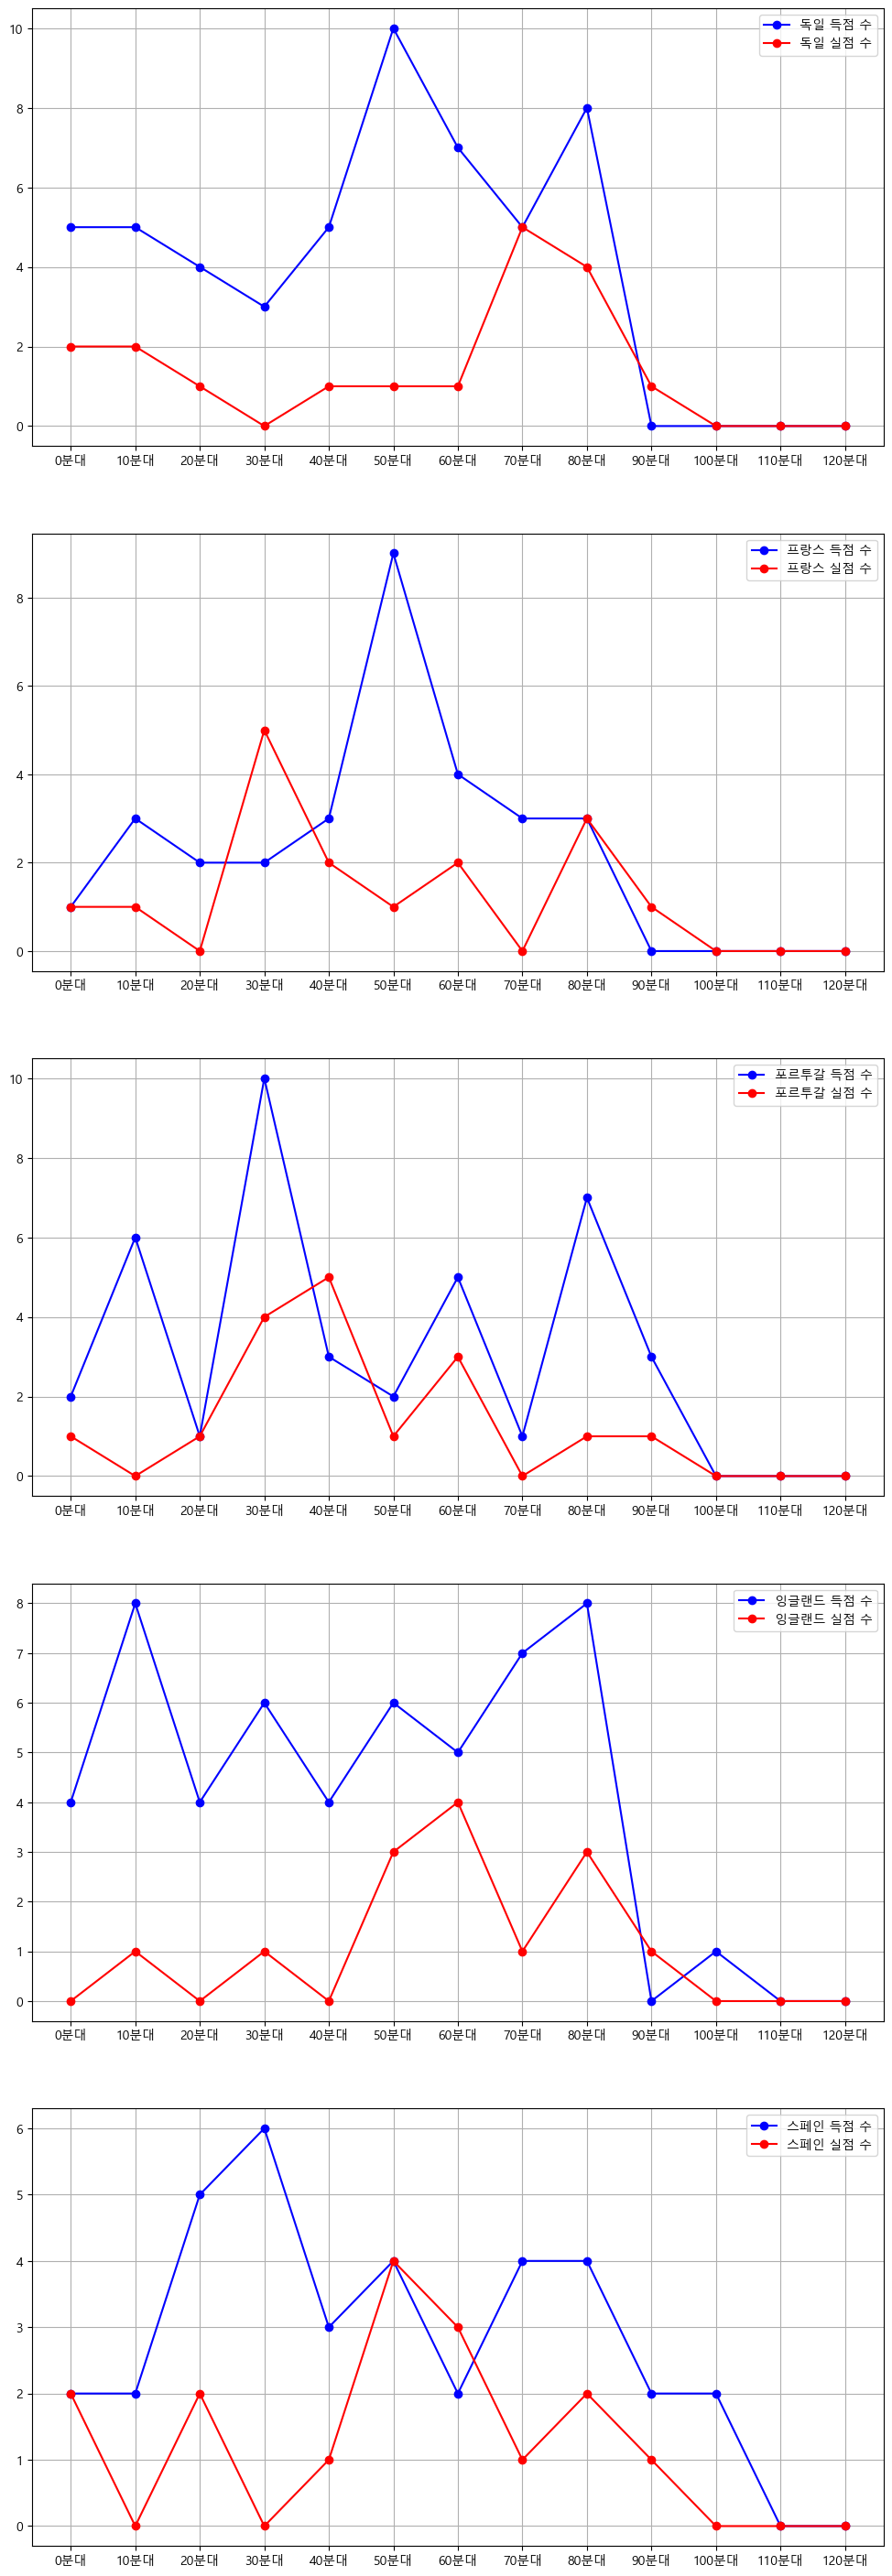

In [38]:
#5개의 그래프를 출력하기 위한 배열/크기 설정
fig, axes = plt.subplots(5, 1, figsize = [12,36])

#독일 경기의 득점/실점 수를 bar그래프로 설정해준다
axes[0].plot(TimeLineGG.index,TimeLineGG['독일'], marker='o',color='blue', label='독일 득점 수')
axes[0].plot(TimeLineGS.index,TimeLineGS['독일'], marker='o',color='red', label='독일 실점 수')

#위에서 설정한 라벨의 위치 지정을 해준다.
axes[0].legend(loc='upper right')
axes[0].grid(True)

#프랑스 경기의 득점/실점 수를 bar그래프로 설정해준다
axes[1].plot(TimeLineGG.index,TimeLineGG['프랑스'], marker='o',color='blue', label='프랑스 득점 수')
axes[1].plot(TimeLineGS.index,TimeLineGS['프랑스'], marker='o',color='red', label='프랑스 실점 수')

#위에서 설정한 라벨의 위치 지정을 해준다.
axes[1].legend(loc='upper right')
axes[1].grid(True)

#포르투갈 경기의 득점/실점 수를 bar그래프로 설정해준다
axes[2].plot(TimeLineGG.index,TimeLineGG['포르투갈'], marker='o',color='blue', label='포르투갈 득점 수')
axes[2].plot(TimeLineGS.index,TimeLineGS['포르투갈'], marker='o',color='red', label='포르투갈 실점 수')

#위에서 설정한 라벨의 위치 지정을 해준다.
axes[2].legend(loc='upper right')
axes[2].grid(True)

#포르투갈 경기의 득점/실점 수를 bar그래프로 설정해준다
axes[3].plot(TimeLineGG.index,TimeLineGG['잉글랜드'], marker='o',color='blue', label='잉글랜드 득점 수')
axes[3].plot(TimeLineGS.index,TimeLineGS['잉글랜드'], marker='o',color='red', label='잉글랜드 실점 수')

#위에서 설정한 라벨의 위치 지정을 해준다.
axes[3].legend(loc='upper right')
axes[3].grid(True)

#스페인 경기의 득점/실점 수를 bar그래프로 설정해준다
axes[4].plot(TimeLineGG.index,TimeLineGG['스페인'], marker='o',color='blue', label='스페인 득점 수')
axes[4].plot(TimeLineGS.index,TimeLineGS['스페인'], marker='o',color='red', label='스페인 실점 수')

#위에서 설정한 라벨의 위치 지정을 해준다.
axes[4].legend(loc='upper right')
axes[4].grid(True)



## 3-4. 이긴다면 처음부터 쭉 강세를 잡는지, 역전에 강한 타입인지 구하기 (성향)
- 처음부터 이겨나가 잘 굴리는 팀인지, 혹은 위험할 때 역전을 잘 하는 팀인지도 분명 나타날 것이다.
- 반대로 역전을 많이 당하거나, 위험할 때 역전을 잘 하지 못하는 팀도 존재할 것이다.
- 이러한 여러가지 성향을 가지고있는 컬럼들을 분석해 성향을 파악해보자.

In [39]:
#전반 득점과 전반 실점 컬럼 비교하여 전반 결과 출력
def firstHalf(x):
    if (x[0]>x[1]):
        return '승'
    elif (x[0]<x[1]):
        return '패'
    elif (x[0]==x[1]):
        return '무'

In [40]:
#전반 결과와 최종 결과를 비교하여 경기 결과 속성을 출력
def matchAttr(x):
    if (x[0]=='승')&(x[1]=='승'):
        return '승기유지'
    elif (x[0]=='패')&(x[1]=='승'):
        return '역전승'
    elif (x[0]=='패')&(x[1]=='패'):
        return '패기유지'
    elif (x[0]=='승')&(x[1]=='패'):
        return '역전패'
    elif (x[0]=='무')&(x[1]=='무'):
        return '무승부유지'
    elif (x[0]=='승')&(x[1]=='무'):
        return '후반추격허용'
    elif (x[0]=='패')&(x[1]=='무'):
        return '후반추격성공'
    elif(x[0]=='무')&(x[1]=='승'):
        return '후반승기쟁취'
    elif(x[0]=='무')&(x[1]=='패'):
        return '후반승기손실'

In [41]:
data[('분석팀', '전반여부')]=data[[('분석팀','전반득점'),('분석팀','전반실점')]].apply(firstHalf, axis=1)

In [42]:
data[('분석팀','승패속성')]=data[[('분석팀', '전반여부'),('분석팀','결과')]].apply(matchAttr,axis=1)

In [43]:
data

분석팀                                                                 \
            날짜    국가 피파랭킹  포메이션 전반득점 전반실점 후반득점 후반실점         득점시간         실점시간   
0   2021-03-25    독일   13   433    2    0    1    0       3,7,56          NaN   
1   2021-03-28    독일   13   433    1    0    0    0           16          NaN   
2   2021-03-31    독일   13  3142    0    1    1    1           63        45,85   
3   2021-06-15    독일   12  3421    0    1    0    0          NaN           20   
4   2021-06-19    독일   12  3421    2    1    2    1  35,39,51,60        15,67   
..         ...   ...  ...   ...  ...  ...  ...  ...          ...          ...   
96  2022-06-07  잉글랜드    5  4231    0    0    1    1           88           51   
97  2022-06-11  잉글랜드    5  4231    0    0    0    0          NaN          NaN   
98  2022-06-14  잉글랜드    5   433    0    1    0    3          NaN  16,70,80,89   
99  2022-09-23  잉글랜드    5   343    0    0    0    1          NaN           68   
100 2022-09-26  잉글랜드    5  3421    0    0    3    3     72,75,83     52,67,87   

     ...      상대팀                     분석팀                              
     ... 공격권 박탈횟수 유효 슈팅  평균연령   평균신장 최종득점 최종실점 패스 성공률 결과 전반여부    승패속성  
0    ...        6     2  32.1  187.1    3    0   92.6  승    승    승기유지  
1    ...        6     2  28.9  180.1    1    0   89.8  승    승    승기유지  
2    ...        9     3  29.4  181.2    1    2   88.8  패    패    패기유지  
3    ...        9     1  29.0  182.7    0    1   89.2  패    패    패기유지  
4    ...        5     2  29.9  181.1    4    2   90.2  승    승    승기유지  
..   ...      ...   ...   ...    ...  ...  ...    ... ..  ...     ...  
96   ...       14     6  28.1  185.6    1    1   79.0  무    무   무승부유지  
97   ...        4     3  26.0  182.9    0    0   88.9  무    무   무승부유지  
98   ...       12     5  27.8  185.1    0    4   88.9  패    패    패기유지  
99   ...        3     3  27.2  185.1    0    1   88.3  패    무  후반승기손실  
100  ...       12     4  26.4  182.3    3    3   79.0  무    무   무승부유지  

[101 rows x 68 columns]

In [44]:
#국가별 경기 결과 속성마다 개수 출력
#nan은 0으로 처리
matchResultTable=data['분석팀'].groupby('국가')['승패속성'].value_counts().unstack(0).T
matchResultTable.fillna(0,inplace=True)
matchResultTable=matchResultTable.astype(int)
matchResultTable

승패속성,무승부유지,승기유지,역전승,패기유지,후반승기손실,후반승기쟁취,후반추격성공,후반추격허용
국가,,,,,,,,
독일,4,9,1,3,1,1,1,0
스페인,3,7,0,1,1,4,0,4
잉글랜드,6,10,0,1,2,3,0,1
포르투갈,2,8,1,3,2,2,1,1
프랑스,3,4,0,2,1,3,4,1


In [45]:
matchG = DataFrame(matchResultTable.T['독일'])
matchS = DataFrame(matchResultTable.T['스페인'])
matchE = DataFrame(matchResultTable.T['잉글랜드'])
matchP = DataFrame(matchResultTable.T['포르투갈'])
matchF = DataFrame(matchResultTable.T['프랑스'])

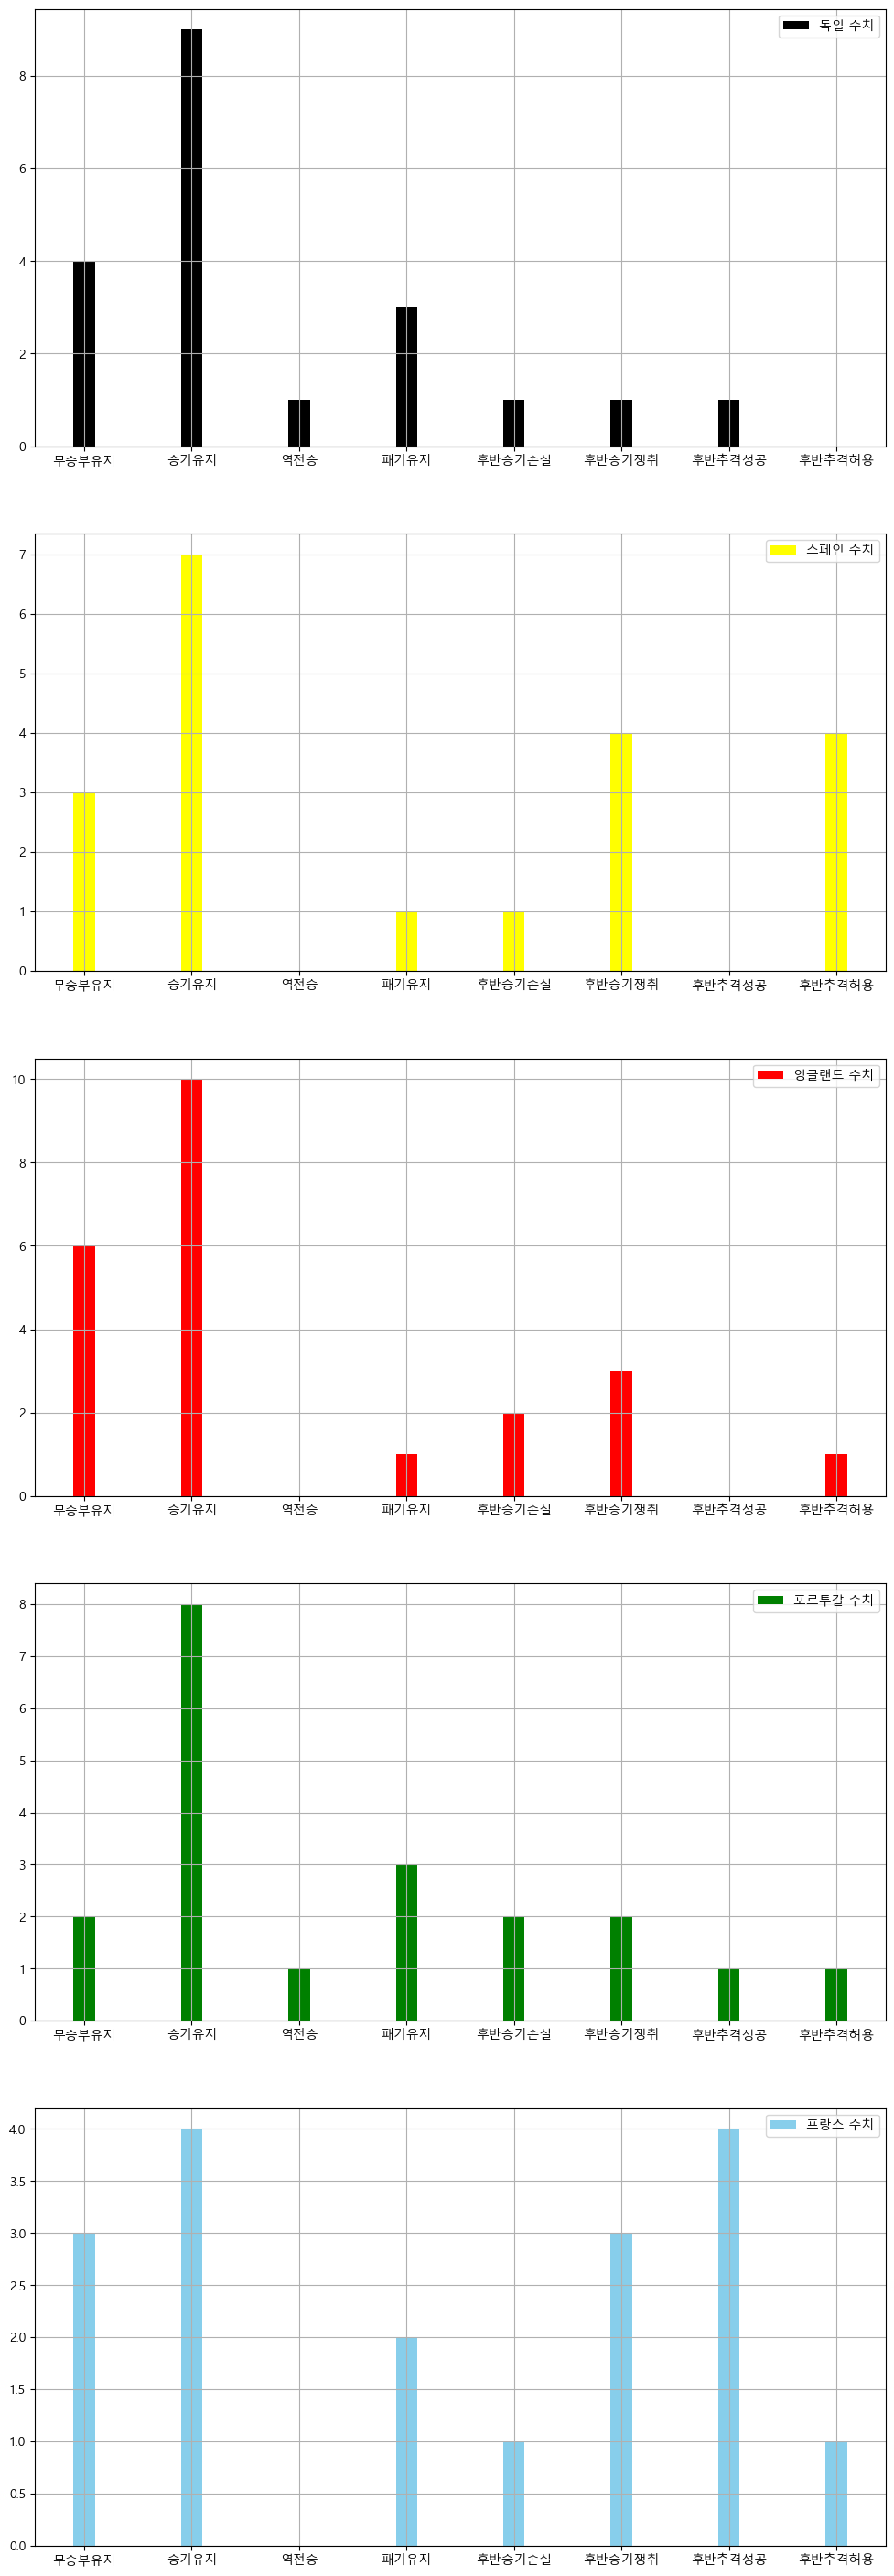

In [46]:
#5개의 그래프를 출력하기 위한 배열/크기 설정
fig, axes = plt.subplots(5, 1, figsize = [12,36])


#각 나라의 수치를 출력해준다.
axes[0].bar(height = matchG['독일'],x = matchG.index,color = 'black',   width = 0.2,label = '독일 수치')
axes[0].grid(True)
axes[0].legend(loc='upper right')
axes[1].bar(height = matchS['스페인'],x = matchS.index,color = 'yellow',   width = 0.2,label = '스페인 수치')
axes[1].grid(True)
axes[1].legend(loc='upper right')
axes[2].bar(height = matchE['잉글랜드'],x = matchE.index,color = 'red',   width = 0.2,label = '잉글랜드 수치')
axes[2].grid(True)
axes[2].legend(loc='upper right')
axes[3].bar(height = matchP['포르투갈'],x = matchP.index,color = 'green',   width = 0.2,label = '포르투갈 수치')
axes[3].grid(True)
axes[3].legend(loc='upper right')
axes[4].bar(height = matchF['프랑스'],x = matchF.index,color = 'skyblue',   width = 0.2,label = '프랑스 수치')
axes[4].grid(True)
axes[4].legend(loc='upper right')